In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform as sp_uniform, randint as sp_randint

# Problem 1

## Problem 1.a

In [22]:
# Load the data
drink_df = pd.read_csv('data/strongdrink.txt')
drink_df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<IPython.core.display.Javascript object>


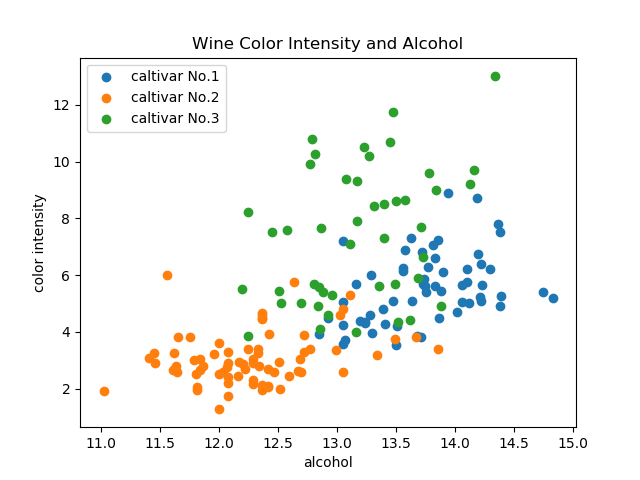

In [23]:
# Plot the data
fig, ax = plt.subplots()
for caltivar in drink_df['cultivar'].unique(): 
    x = drink_df.loc[drink_df['cultivar'] == caltivar, 'alco']
    y = drink_df.loc[drink_df['cultivar'] == caltivar, 'color_int']
    ax.scatter(x, y, label='caltivar No.' + str(caltivar))
ax.legend()
plt.xlabel("alcohol")
plt.ylabel("color intensity")
plt.title("Wine Color Intensity and Alcohol")
fig.show()

### Standardize the data
To make the task consistent across each method, we fit every model with the normalized the data using `sklearn.preprocessing.StandardScaler`. If the data is not normalized, the neural network model would not converge. After several experimentation, I find that standardizing the data improves the performance of the models by reducing the cross-validated MSE. 

About why we should normalize data, a useful reference is: http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

In [24]:
# To make the task consistent across each method, we normalize the data using `StandardScaler`. 
# If the data is not normalized, the neural network model would not converge. 
X = drink_df[['alco', 'malic', 'tot_phen', 'color_int']]
y = drink_df['cultivar']
X = StandardScaler().fit_transform(X)

## Problem 1.b

Multinomial Logistic Classifier

In [25]:
# Specify a multinomial logistic model
logistic_clf = LogisticRegression()

In [26]:
# Tune the hyperparameters
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(logistic_clf, param_distributions=param_dist1, 
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
random_search1.fit(X, y)

print('Best tuning parameters = ', random_search1.best_params_)
print('MSE of optimal results = ', -random_search1.best_score_)

Best tuning parameters =  {'C': 1.8170437946794404, 'penalty': 'l2'}
MSE of optimal results =  0.09571428571428572


## Problem 1.c

Random Forest Classifier

In [27]:
# Specify a Random Forest model
randomforest_clf = RandomForestClassifier(bootstrap=True, oob_score=True)

In [28]:
# Tune the hyperparameters
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
random_search2 = RandomizedSearchCV(randomforest_clf, param_distributions=param_dist2, 
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
random_search2.fit(X, y)

print('Best tuning parameters = ', random_search2.best_params_)
print('MSE of optimal results = ', -random_search2.best_score_)

Best tuning parameters =  {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 9, 'min_samples_split': 17, 'n_estimators': 80}
MSE of optimal results =  0.13


## Problem 1.d

Support Vector Machines Classifier

In [29]:
# Specify a SVC model
svc_clf = SVC(kernel='rbf')

In [30]:
# Tune the hyperparameters
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(svc_clf, param_distributions=param_dist3, 
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
random_search3.fit(X, y)

print('Best tuning parameters = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Best tuning parameters =  {'C': 2.8883894070106906, 'gamma': 'auto', 'shrinking': False}
MSE of optimal results = 0.08952380952380953


## Problem 1.e

Neural Network Classifier

In [31]:
# Specify a neural network model
nn_clf = MLPClassifier(solver='lbfgs', max_iter=500)

In [32]:
# Scale 

# Tune the hyperparameters
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
random_search4 = RandomizedSearchCV(nn_clf, param_distributions=param_dist4, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search4.fit(X, y)

print('Best tuning parameters = ', random_search4.best_params_)
print('MSE of optimal results =', -random_search4.best_score_)

Best tuning parameters =  {'activation': 'relu', 'alpha': 1.5925521699129908, 'hidden_layer_sizes': 15}
MSE of optimal results = 0.0842857142857143


## Problem 1.f

Evaluate different models

In [34]:
names = ['LogisticRegression', 'RandomRorest', 'SVC', 'NeuralNetwork']
classifiers = [random_search1, random_search2, random_search3, random_search4]
evalutation_df = pd.DataFrame(data={'method': names, 
                   'MSE of optimal results': [-clf.best_score_ for clf in classifiers]})
evalutation_df

,method,MSE of optimal results
0,LogisticRegression,0.095714
1,RandomRorest,0.130000
2,SVC,0.089524
3,NeuralNetwork,0.084286


The Neural Network method is the best predictor of `cultivar` since it has the lowest MSE of the optimal result. 

Note that the result can be different if the data had not been standardized, and the Neural Network cannot converge using the the data of its original scale. To ensure the comparison to be consistent across methods, we have normalized the features variables using `sklearn.preprocessing.StandardScalar` to make the comparison 